# A Simple Optimal Growth Model

参考: [http://quant-econ.net/py/optgrowth.html](http://quant-econ.net/py/optgrowth.html)

http://www.rieb.kobe-u.ac.jp/academic/ra/dp/English/dp180.pdf  
http://www.econ.hokudai.ac.jp/~kudoh/Bellman.pdf  
http://www.hara.kier.kyoto-u.ac.jp/NoteByInami3.pdf  
Stokey Lucas with Prescott Chapter 2, 3, 4, (9)

In [34]:
%matplotlib inline
import math
import numpy as np
from scipy.optimize import fminbound
from scipy import interp
import matplotlib as mpl
import matplotlib.pyplot as plt
import quantecon as qe
np.set_printoptions(precision=5)
plt.rcParams['font.size'] = 13
# 日本語対応
mpl.rcParams['font.family'] = 'Osaka'

# 1. ケーキ食べ問題（2期間）

次のように, 今日（t=0）と明日（t=1）に分けてケーキを食べる問題を考える.

$$
\begin{align}
\max_{c_0, c_1} \hspace{5pt} & u(c_0) + \beta u(c_1) \\
s.t. \ & c_0 + c_1 \leq \bar{x}\\
& c_0 , c_1 \geq 0
\end{align}
$$

* $u(・)$: 効用関数, $u'(c) < 0, u''(c) > 0$（凹関数）  
* $c_0, c_1$: 今日, 明日のケーキの消費量  
* $\beta$: 割引因子$\in(0, 1)$  
* $\bar{x}$: ケーキの総量

例えば今, $u(c) = \log(c), \ \beta = 0.5, \ \bar{x} = 1$ と置くと, 問題は

$$
\begin{align}
\max_{c_0} \hspace{5pt} \log(c_0) + 0.5 \log(1 - c_0) \hspace{5pt} s.t. \hspace{5pt} c_0 \geq 0
\end{align}
$$

と書き直せるので（ケーキを残すよりは全て消費した方が効用が上がるので, $c_0 + c_1 = 1$が望ましい. 厳密にはKKT条件を使う）, これを解くと, 

$$
\begin{align}
\it{L} &= \log(c_0) + 0.5 \log(1 - c_0) \\
\\
\text{F.O.C.は, } &\\
\\
\frac{d\it{L}}{dc_0} & = \frac{1}{c_0} - \frac{0.5}{1-c_0} = 0 \\
\therefore c_0 & = \frac{2}{3}
\end{align}
$$

となって, 今日2/3, 明日1/3消費するのが最適になる.

# 2. ケーキ食べ問題（n期間）

同じ問題をn期間で考える.

$$
\begin{align}
\max_{c_t, \ t \in \{0, 1, \ldots, n-1 \}} \hspace{5pt} & \sum_{t=0}^{n-1} \beta^{t} u(c_t) \\
s.t. \ & c_0 + \ldots + c_{n-1} \leq \bar{x}\\
& c_0 , \ldots, c_{n-1} \geq 0
\end{align}
$$

ラグランジュの未定乗数法で解く.

$$
\begin{align}
\it{L} &= \sum_{t=0}^{n-1} \beta^{t} u(c_t) + \lambda (c_0 + \ldots + c_{n-1} - \bar{x}) \\
\\
\text{F.O.C.は, } &\\
\\
\frac{\partial \it{L}}{\partial c_t} & = \beta^t u'(c_t) + \lambda = 0 \hspace{15pt} \forall t \in \{0, 1, \ldots, n-1 \} \\
\frac{\partial \it{L}}{\partial \lambda} & = \sum_{t=0}^{n-1} c_t - \bar{x} = 0
\end{align}
$$

上と同様に, $u(c) = \log(c), \ \beta = 0.5, \ \bar{x} = 1$ と置くと, 第1式から, 

$$
\begin{align}
\frac{1}{c_0} &= \frac{\beta}{c_1} = \ldots = \frac{\beta^{n-1}}{c_{n-1}} \\
\therefore c_1 &= \beta c_0, c_2 = \beta^2 c_0, \ldots, c_{n-1} = \beta^{n-1} c_0
\end{align}
$$

となり, 

$$
\begin{align}
\sum_{t=0}^{n-1} c_t &= \sum_{t=0}^{n-1} \beta^t c_0 \\
&= \frac{1 - \beta^n}{1 - \beta} c_0 \\
&= \frac{1 - 0.5^n}{0.5} c_0 = 1
\\
\therefore c_0 & = \frac{2}{1 - 0.5^n}
\end{align}
$$

となり, 他の$c_1, \ldots, c_{n-1}$ も求まる.

# 3. ケーキ食べ問題2（n期間）

2の問題を, t期開始時点でのケーキの残量を表す変数 $x_0, x_1, \ldots, x_n $ を導入して書き換えることを考えると, 

$$
\begin{align}
\max_{c_t, x_{t+1}} \hspace{5pt} & \sum_{t=0}^{n-1} \beta^{t} u(c_t) \\
s.t. \ & c_t + x_{t+1} = x_t \hspace{15pt} \forall t \in \{0, 1, \ldots, n-1 \} \\
& x_0 = \bar{x} \\
& c_0 , c_1, \ldots, c_{n-1}, x_0, x_1, \ldots x_n \geq 0
\end{align}
$$

となる. ただし, 2で与えていた条件 $\sum_{t=0}^{n-1} c_t = \bar{x}$ は除いている. ここで, $c_t$を制御変数（Control Variable）, $x_t$を状態変数（State Variable）という.

$c_t$ を消去すると, 

$$
\begin{align}
\max_{x_0, \ldots, x_n} \hspace{5pt} & \sum_{t=0}^{n-1} \beta^{t} u(x_t - x_{t+1}) \\
s.t. \ & x_0 = \bar{x} \\
& x_0, x_1, \ldots, x_n \geq 0
\end{align}
$$

と, 制御変数だけで書き直せる. この問題のラグランジュ関数は, 

$$
\begin{align}
{\it L} = \sum_{t=0}^{n-1} \beta^{t} u(x_t - x_{t+1})
\end{align}
$$

となり, F.O.Cは, 

$$
\begin{align}
\frac{\partial \it{L}}{\partial x_{t+1}} &= - \beta^t u'(x_t - x_{t+1}) + \beta^{t+1} u'(x_{t+1} - x_{t+2}) = 0
\hspace{15pt} \forall t \in \{0, 1, \ldots, n-2 \} \\
\frac{\partial \it{L}}{\partial x_n} &= - \beta^{n-1} u'(x_{n-1} - x_{n}) = 0
\end{align}
$$

ここで, 2番目の条件は

$$
\begin{align}
\beta^{n-1} u'(x_{n-1} - x_{n}) = 0
\end{align}
$$

または

$$
\begin{align}
\beta^{n-1} u'(x_{n-1} - x_{n}) \leq 0, x_n = 0
\end{align}
$$

の時に成り立つ（KKT conditionによる）. 

2式の意味は「最後の期には資産（ケーキ）を残さない」 か 「残っていたとしても, 無価値」 である状態が最適ということ（今の設定の場合, 残ったケーキが無価値ということはあり得ないが, 無限期間に拡張した場合にはあり得るのでこうしておく）.

2つをまとめて

$$
\begin{align}
\beta^{n-1} \frac{\partial u(x_{n-1} - x_{n})}{\partial x_n} x_n = 0
\end{align}
$$

を横断性条件（Transversality Condition）という.

# 4. ケーキ食べ問題（無限期間）

同じ問題を無限期間で考える.

$$
\begin{align}
\max_{c_t, \ t \in \{0, 1, \ldots \}} \hspace{5pt} & \sum_{t=0}^{\infty} \beta^{t} u(c_t) \\
s.t. \ & \sum_{t=0}^\infty c_t \leq \bar{x}\\
& c_0 , c_1, \ldots \geq 0
\end{align}
$$

3と同様に, t期開始時点でのケーキの残量を表す変数 $x_0, x_1, \ldots$ を導入すると, 問題は

$$
\begin{align}
\max_{c_t, x_{t+1}} \hspace{5pt} & \sum_{t=0}^{\infty} \beta^{t} u(c_t) \\
s.t. \ & c_t + x_{t+1} = x_t \hspace{15pt} \forall t \in \{0, 1, \ldots \} \\
& x_0 = \bar{x} \\
& c_0 , c_1, \ldots, x_0, x_1, \ldots \geq 0
\end{align}
$$

と書き直せる. 

この問題のラグランジュ関数は, 

$$
\begin{align}
\it{L} = \sum_{t=0}^{\infty} \beta^{t} \left( u(c_t) + \lambda_t (c_t + x_{t+1} - x_t) \right)
\end{align}
$$

となり, F.O.Cは, 

$$
\begin{align}
\frac{\partial \it{L}}{\partial c_t} &= \beta^t \left( u'(c_t) + \lambda_t \right) = 0 \\
\frac{\partial \it{L}}{\partial x_{t+1}} &= \beta^t \lambda_t - \beta^{t+1} \lambda_{t+1} = 0 \\
\frac{\partial \it{L}}{\partial \lambda_t} &= c_t + x_{t+1} - x_t = 0 \\
\end{align}
$$

となる. 変形して, 

$$
\begin{align}
u'(c_t) &= - \lambda_t \\
\lambda_t &= \beta \lambda_{t+1} \\
\end{align}
$$

1式を2式に代入して, 

$$
\begin{align}
& u'(c_t) = \beta u'(c_{t+1}) \\
\text{または, } \hspace{10pt} &\\
& u'(x_{t} - x_{t+1}) = \beta u'(x_{t+1} - x_{t+2}) 
\end{align}
$$

を得る. これがオイラー方程式.

3と同様に, オイラー方程式のみからは最適経路は求まらず, 次の横断性条件（Transversality Condition）

$$
\begin{align}
\lim_{t \to \infty} \beta^t \frac{\partial u(x_t, x_{t+1})}{\partial x_{t+1}} x_{t+1} = 0\\
\end{align}
$$

が必要になる. これはn期間の横断性条件の極限をとったものになっている.

## オイラー方程式・横断性条件の必要性

上の問題の解 $x_0, x_1, \ldots$ が与えられた時, それオイラー方程式を満たすのは自明. 

横断性条件の必要性は Kamihigashi(2002) を参照.

## オイラー方程式・横断性条件の十分性

一般にオイラー方程式・横断性条件を満たすような $x_0, x_1, \ldots$ が（すべて）元の問題の最適解であることを言うためには条件が必要.

詳しくはSLP theorem 4.15を参照.

## 具体的な解の導出方法

オイラー方程式と横断性条件が与えられたとして, どのようにして具体的な解を求めるか？　

そもそも, 無限期間のSequential Problemの解が解析的に書ける（例えば$c_t = log(x_t) + 3$ のように ）ことはめったにない.

しかし, ごく限られた問題については, 簡単な関数形で統一的に解が書けることが知られている. このような場合には「Guess and Verify」: 

1. まず, 関数形を $c_t = \alpha log(x_t) + C$ のようにGuessする
1. 次に, その解がオイラー方程式・横断性条件をみたしていることをVerifyする

を行うことができる. 

# 5. ケーキ食べ問題（無限期間, 関数方程式）

同じ問題を考える. 

$$
\begin{align}
\max_{c_t, x_{t+1}} \hspace{5pt} & \sum_{t=0}^{\infty} \beta^{t} u(c_t) \\
s.t. \ & c_t + x_{t+1} = x_t \hspace{15pt} \forall t \in \{0, 1, \ldots \} \\
& x_0 = \bar{x} \\
& c_0 , c_1, \ldots, x_0, x_1, \ldots \geq 0
\end{align}
$$

はSequential Problemと呼ばれ, $x_0, x_1, \ldots$ の差分方程式になっている. 

一方でこの問題は, 価値関数（Value Function）を用いて, 次のように書き換えることができる.

$$
\begin{align}
v(x_t) &= \max_{c_t} \hspace{3pt} u(x_t - x_{t+1}) + \beta v(x_{t+1}) \\
s.t. \ & x_0 = \bar{x}\\
& c_0 , c_1, \ldots, x_0, x_1, \ldots \geq 0
\end{align}
$$

これは関数方程式（Functional Equation）で, $v(x_t)$ は t期時点から見た, t+1期以降の効用の和の最大値を表している.

## 政策関数

ここで, 政策関数（Policy Function）

$$
\begin{align}
c_t = \sigma_t(x_t)
\end{align}
$$

を考える. これは, t期のState Variable（例えば, t期開始時のケーキの残量）が与えられたもとで, Control Variable（例えば, t期にケーキをどのくらい消費するか）を決定する関数になっている. 

一定の仮定のもとで, 政策関数はtに依存せず

$$
\begin{align}
c_t = \sigma(x_t)
\end{align}
$$

と一意に表現できる（SLP Chap4）.

このことから, 関数方程式の解は

$$
\begin{align}
v(x) &= \max_{c_t} \hspace{3pt} u(c_t) + \beta v(x)
\end{align}
$$

の解として表現できる. 

この関数方程式と, 横断性条件

$$
\begin{align}
\lim_{t \to \infty} \beta^t v(x_t) = 0\\
\end{align}
$$

を満たす解v(x)は, 元の関数方程式を満たす(SLP Theorem4.5).

## SPとFEの関係

一定の仮定のもとで, Sequential Problemの解はFunctional Equationを満たす（SLP Theorem4.4）.

一方で, Functional Equationと横断性条件を満たすfeasible planは, Sequential Problemの解を与える.

では, 何故SP以外にFEが必要なのか？

SPからオイラー方程式を導出するためには, 目的関数や制約条件が微分可能でなければならない. また, 最適性を保証するためにはuやfが凹関数であることも必要.

このような条件が満たされない時には, オイラー方程式と横断性条件による解法は使えない. 一方で, FEは各期の最適化の構造が1期間の差分方程式で書けさえすればよい. その点で, FEはより柔軟に問題を表現できる.

## FEからオイラー方程式の導出

Value Functionを微分するとオイラー方程式が導出できる. つまり, FEからSPを導出することができる（ただし, Value Functionが微分可能な場合に限る: オイラー方程式が導出できる条件と同じ）.

## 具体的な解法

ベルマン方程式を解く具体的な方法としては, 大きく分けて

1. Guess and Verify
1. Iteration Method（繰り返し近似法）

がある. 

## Guess and Verify

Guess and Verifyはオイラー方程式の場合とほぼ同じ. Value FunctionまたはPolicy Functionの具体的な関数形を推測し, 1. 関数方程式を満たすか（つまり, 関数方程式を満たすように推測した関数形の係数を決定できるか）  2. 横断性条件を満たすか をチェックすれば良い.

ただし, これが使える問題は非常に限られている（多くの問題ではOptimal Value FunctionやPolicy Functionを簡単な関数形で表現することはできないので）. 一般には, 次のIterationによる方法を用いる.

## Iteration Method（繰り返し近似法）

ここでは, Value Function Iteration という方法を説明する. やり方はいたって簡単.

2. Initial Value Function $v_0$ を適当にGuessする
2. 次の更新ルールに従って, $v_t$ を次々に作っていく
2. $v_t$ と $v_{t+1}$ が十分近くなったら, iterationをやめる

$$
\begin{align}
v_{t+1}(x) &= \max_{c} \hspace{3pt} u(c) + \beta v_t(x) \hspace{15pt} \forall t \in \{0, 1, \ldots \} \\
\end{align}
$$

更新式は, Bellman Operator $T$ を用いて, 次のようにも書くこともある. 

$$
\begin{align}
v_{t+1} &= T v_t \\
\end{align}
$$

6で扱う最適成長モデルの場合, $u, f$がcontinuousかつ$u$がboundedなどの条件を満たせば, 少なくとも1つの最適解に収束することが示されている（SLP chap4）.

# 6. Simple Optimal Growth Model

次のような単純な最適成長モデルを考える.

$$
\begin{align}
\max_{c_t, k_{t+1}} \hspace{5pt} & \sum_{t=0}^{\infty} \beta^{t} u(c_t) \\
s.t. \ & c_t + k_{t+1} = f(k_t) \hspace{15pt} \forall t \in \{0, 1, \ldots \} \\
& k_0 = \bar{k} \\
& c_0 , c_1, \ldots, k_0, k_1, \ldots \geq 0\\
\end{align}
$$

このSequential ProblemをFunctional Equationの形で書き直すと, 

$$
\begin{align}
v(k_t) = & \max_{k_{t+1}} \hspace{3pt} u(f(k_t) - k_{t+1}) + \beta v(k_{t+1}) \\
s.t. \ & k_0 = \bar{k}\\
& c_0 , c_1, \ldots, k_0, k_1, \ldots \geq 0\\
\end{align}
$$

となる. これを解いて, Optimal Policy = 「各期開始時に資本 $k_t$ が与えられたもとで, その資本を$c_t$: 消費 と $x_{t+1}$: 生産 にどう割り振ればいいかを決める政策」を求めることが目標となる.

## Guess and Verify

今, $u(c_t) = log c_t$, $f(k_t) = $ と特定化する. この時, Optimal Value Functionは, 

$$
v^*(k_t) = A + B \log k_t, \hspace{15pt} A, B: \text{const}
$$

になることが知られている. 実際, これをFEに代入すると, 

$$
v(k_t) = \max_{k_{t+1}} \hspace{3pt} u(A + B \log k_t - k_{t+1}) + \beta ( A + B \log k_{t+1} ) \\
$$

となり, $k_{t+1}$ で微分した条件を用いて係数比較を行うと, 

$$
\begin{align}
A &= \frac{\log(1-\alpha \beta)}{1 - \beta} + \frac{\log(\alpha \beta) \alpha \beta }{(1 - \alpha \beta)(1 - \beta)}\\
B &= \frac{\alpha}{1 - \alpha \beta}
\end{align}
$$

となる.　これが横断性条件を満たすことも示せる（が, 少し面倒）.

## Value Function Interation

上で書いたValue Function Iterationのステップを順に行う. ただしコンピュータ上で定義域内の任意の関数を表現するには, 定義域全ての点での関数値をもつ必要があるが, それは不可能. 

そこで関数の定義域を適当にグリッドで切り, その関数値だけを保存, それ以外の関数値は線形補間する. これを Fitted Value Iteration という.

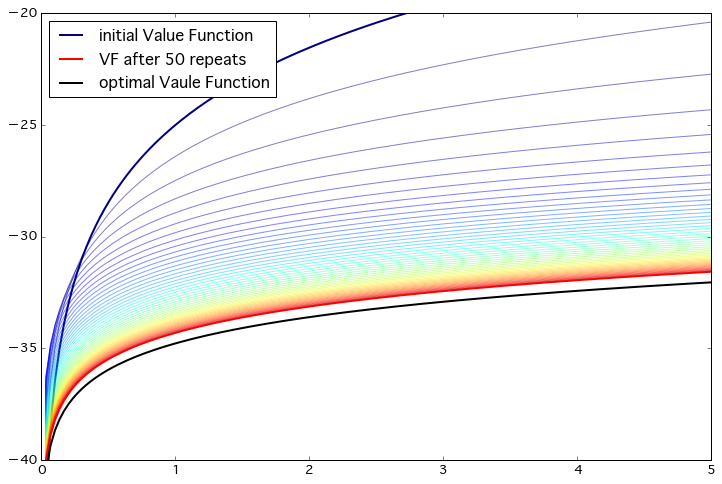

In [30]:
# Primitives and grid
alpha = 0.65
beta = 0.95
grid_min = 1e-6
grid_max = 5
grid_size = 150
grid = np.linspace(grid_min, grid_max, grid_size)

# Exact solution
ab = alpha * beta
c1 = (np.log(1 - ab) + np.log(ab) * ab / (1 - ab)) / (1 - beta)
c2 = alpha / (1 - ab)

def v_star(k):
    return c1 + c2 * np.log(k)

def bellman_operator(w):
    # Apply linear interpolation to w
    Aw = lambda x: interp(x, grid, w)

    # set Tw[i] equal to max_c { log(c) + beta w(f(k_i) - c)}
    Tw = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - np.log(c) - beta * Aw(k**alpha - c)
        c_star = fminbound(objective, grid_min, k**alpha)
        Tw[i] = - objective(c_star)

    return Tw

if __name__ == '__main__':
    w = 5 * np.log(grid) - 25  # An initial condition -- fairly arbitrary
    n = 50
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_ylim(-40, -20)
    ax.set_xlim(np.min(grid), np.max(grid))

    ax.plot(grid, w, color=plt.cm.jet(0), linewidth=2, label="initial Value Function")
    
    for i in range(n-1):
        w = bellman_operator(w)
        ax.plot(grid, w, color=plt.cm.jet(i / n), linewidth=1, alpha=0.5)
    w = bellman_operator(w)
    ax.plot(grid, w, color="red", linewidth=2, label="VF after {} repeats".format(n))

    ax.plot(grid, v_star(grid), 'k-', linewidth=2, label="optimal Vaule Function")
    ax.legend(loc='upper left')

    plt.show()

## 対応するPolicy Functionを求める

In [38]:
def compute_greedy(w):
    Aw = lambda x: interp(x, grid, w) 

    sigma = np.empty(grid_size)
    for i, k in enumerate(grid):
        objective = lambda c: - np.log(c) - beta * Aw(k**alpha - c)
        sigma[i] = fminbound(objective, 1e-6, k**alpha)
    return sigma

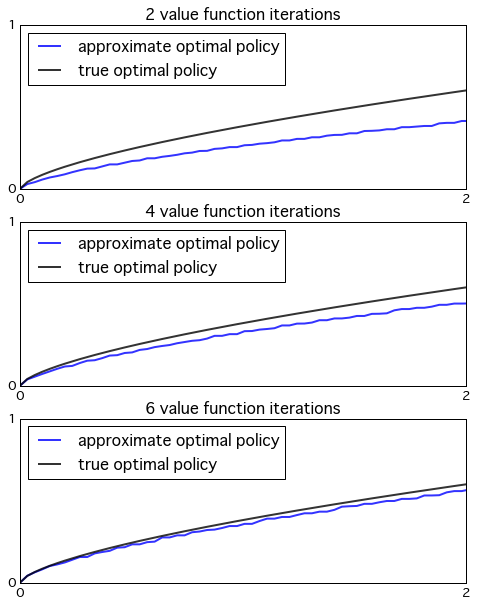

In [40]:
true_sigma = (1 - alpha * beta) * grid**alpha
fig, ax = plt.subplots(3, 1, figsize=(8, 10))

for i, n in enumerate((2, 4, 6)):
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 2)
    ax[i].set_yticks((0, 1))
    ax[i].set_xticks((0, 2))

    w = 5 * np.log(grid) - 25  # Initial condition
    v_star = qe.compute_fixed_point(bellman_operator, w, 
                                 max_iter=n, 
                                 verbose=0)
    sigma = compute_greedy(v_star)

    ax[i].plot(grid, sigma, 'b-', lw=2, alpha=0.8, label='approximate optimal policy')
    ax[i].plot(grid, true_sigma, 'k-', lw=2, alpha=0.8, label='true optimal policy')
    ax[i].legend(loc='upper left')
    ax[i].set_title('{} value function iterations'.format(n))
    